<a href="https://colab.research.google.com/github/SABBiR1107/eCommerceProject/blob/main/eCommerceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Quick Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,132220
Country,0


# Data Cleaning

In [ ]:
df.dropna(subset=['CustomerID'],inplace=True)

/tmp/ipython-input-19-264521882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['CustomerID'],inplace=True)


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/tmp/ipython-input-20-3633860036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# Feature Engineering


In [ ]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

**Monthly Revenue**

In [ ]:
total_revenue = df['Revenue'].sum()
print("Total Revenue: BDT", round(total_revenue, 2))

Total Revenue: BDT 8911407.9


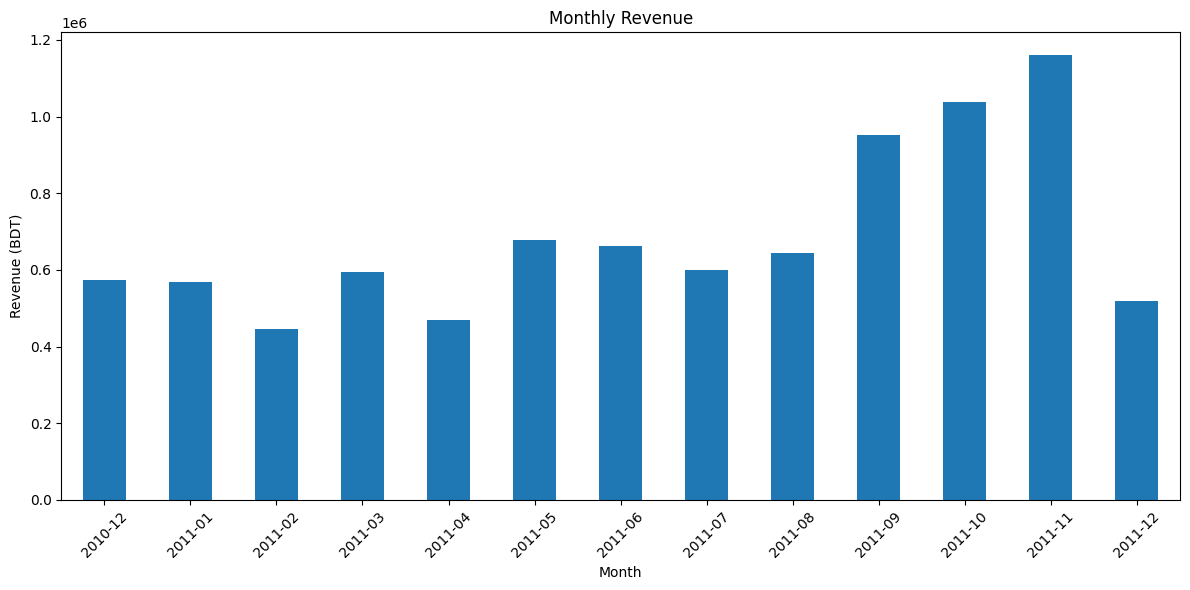

In [ ]:
monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum()
monthly_revenue.plot(kind='bar', figsize=(12, 6), title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (BDT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Prodcuts By Revenue

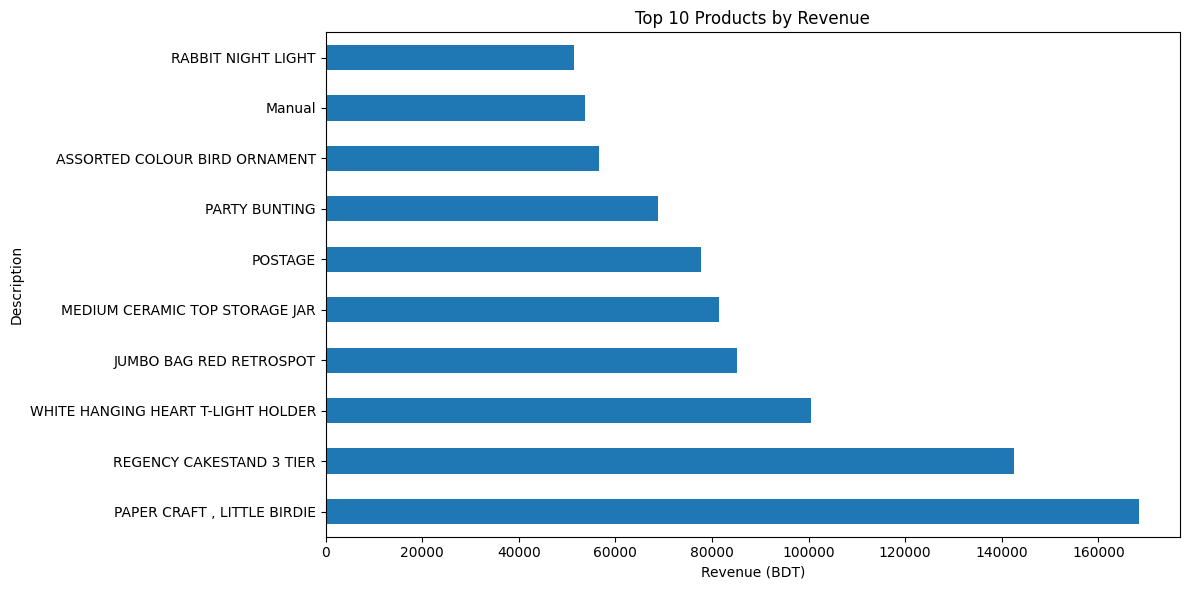

In [ ]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(12,6),title='Top 10 Products by Revenue')
plt.xlabel('Revenue (BDT)')
plt.tight_layout()
plt.show()

# Revenue by Country

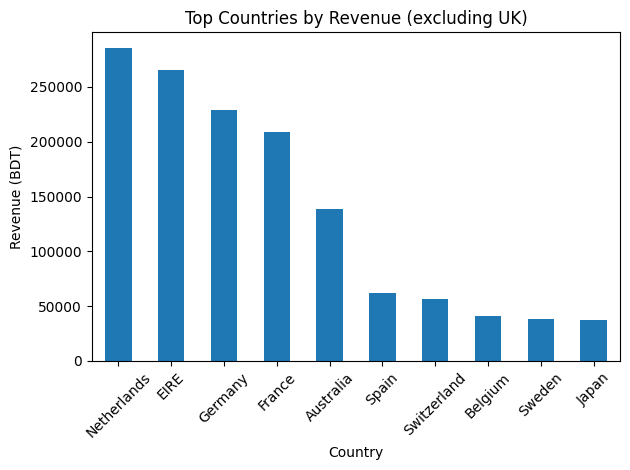

In [ ]:
country_revenue = df[df['Country'] != 'United Kingdom'].groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
country_revenue.plot(kind='bar', title='Top Countries by Revenue (excluding UK)')
plt.ylabel('Revenue (BDT)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Average Basket Size per Invoice

In [ ]:
invoice_data = df.groupby('InvoiceNo').agg({'Quantity': 'sum', 'Revenue': 'sum'})
print("Average Basket Size (Items):", round(invoice_data['Quantity'].mean(), 2))
print("Average Basket Value (BDT):", round(invoice_data['Revenue'].mean(), 2))

Average Basket Size (Items): 278.86
Average Basket Value (BDT): 480.87


# Correlation

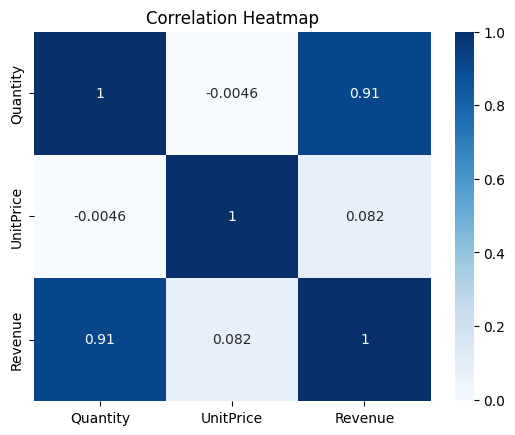

In [ ]:
corr = df[['Quantity', 'UnitPrice', 'Revenue']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()